# <span style='color:blue;'>Loading Data and Libraries</span>

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display # to print data in a clean fashion
import math

# Library Configurations: 
sns.set() # make seaborn override the styling of matplotlib graphs

# If you want to print all columns and rows uncomment the lines below
#pd.set_option('display.max_columns', None) # display all columns
#pd.set_option('display.max_rows', None) # display all rows

## Load Data

In [2]:
data = pd.read_csv('data/train.csv')

<hr>

# <span style='color:blue;'> Understanding The Dataset<span>

## Visualizing the head and tail 

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Checking the shape of the data frame

In [5]:
data.shape

(891, 12)

## Checking the data types of the columns
Note: Operations on a data frame typically result in a 1 dimension lower output   

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
ParCh            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### More info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
ParCh          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 5 summary statistic

On dtypes other than objects

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Display summary statistics for categorical features

In [9]:
data.describe(include='object')

,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Perreault, Miss. Anne",male,CA. 2343,G6,S
freq,1,577,7,4,644


## Exploring Column Value counts

Too much to print, uncomment if you are interested 

In [10]:
# for column_name in data:
#     print(column_name)
#     display(data[column_name].value_counts(dropna=False).sort_index(ascending=False))
#     print()

## Exploring Column Unique Values
Too much to print, uncomment if you are intereste

In [11]:
# for column_name in data:
# #     print(column_name)
#     display(data[column_name].unique())
#     print()

## Checking how many null values each column has
Note: Operations on a data frame typically result in a 1 dimension lower output   

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Filtering 

```isin()``` method helps in selecting rows with having a particular (or Multiple) value in a particular column. It return a boolean series (```in_specified_ports```) which can be passed to the data frame to see new filtered data frame.

In [13]:
ports_to_search = ['C', 'S']
in_specified_ports = data['Embarked'].isin(ports_to_search)
data[in_specified_ports].head(6) # note that not all rows will be shown

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Negating the boolean series to see the other (opposite) data 
i.e. opposite ports than specified

Negate the boolean series with the tilda symbol ```~```

In [14]:
data[~in_specified_ports].head() # note the ~ negates the bool series 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


### Resetting the indexes
Note: when filtering the indexes do not start at 1 and increment by one every time
 
Using ```reset_index()``` we can fix this problem
- passing in the argument drop=True will throw away the old indexes 
- passing in the argument drop=False will make a new column in the data frame and the corresponding value for each row will be the old index

In [15]:
ports_to_search = ['C', 'S']

in_specified_ports = data['Embarked'].isin(ports_to_search) # bool series
data_of_specified_ports = data[in_specified_ports]
data_of_specified_ports = data_of_specified_ports.reset_index(drop=True) 

not_in_specified_ports = ~in_specified_ports # bool series
data_not_of_specified_ports = data[not_in_specified_ports]
data_not_of_specified_ports = data_not_of_specified_ports.reset_index(drop=True) 

display(data_of_specified_ports.head())
display(data_not_of_specified_ports.head())

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
1,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
2,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
3,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
4,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


<hr>

# <span style='color:blue;'>Visualizing The Data Using Density Distrubutions</span>


## Numerical Distributions

## Bar Chart
Note: only works with numerical data

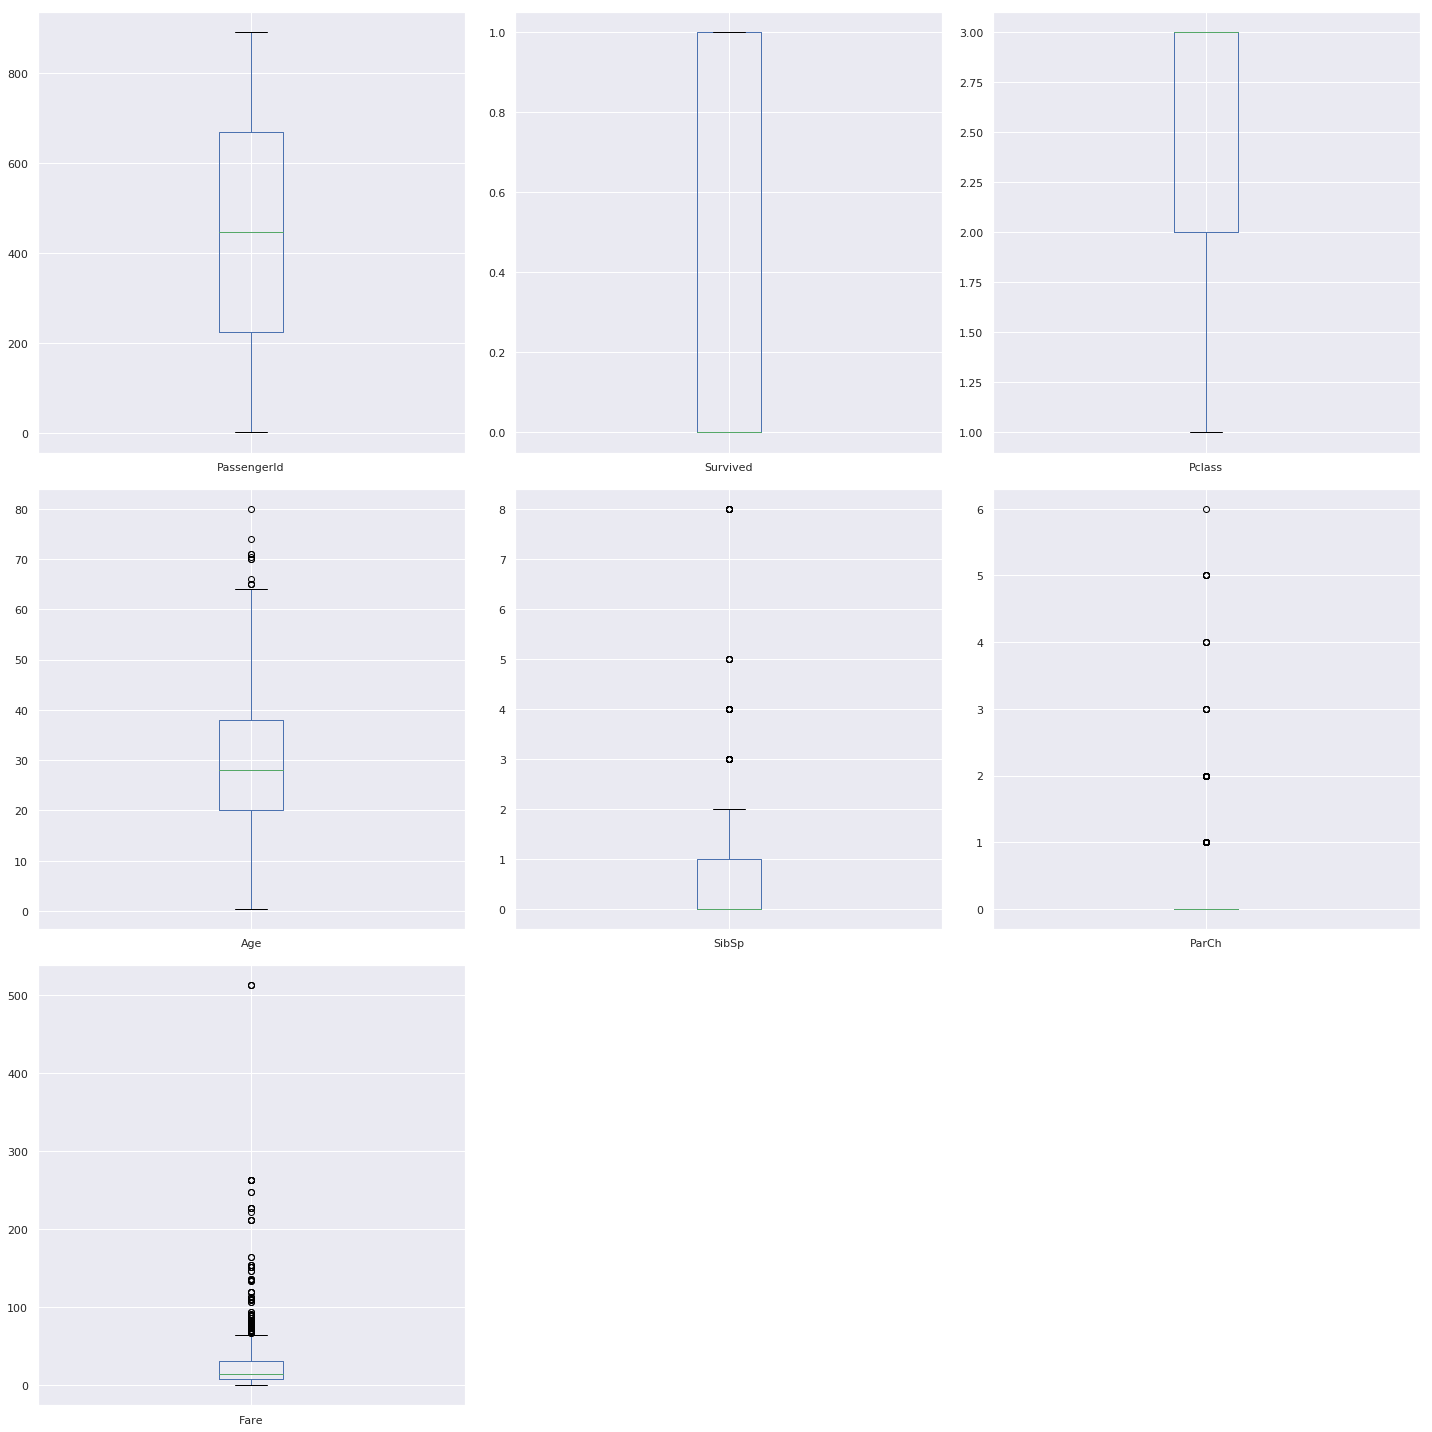

In [16]:
# preparing the numerical data 
numerical_column_names = data.dtypes[data.dtypes != object].index
num_of_plots = len(numerical_column_names)
num_of_cols = 3
num_of_rows = math.ceil(num_of_plots / num_of_cols)

# create a figure and an array of subplots with appropriate rows and columns
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(20, 20))

# creating the plots
for i,el in enumerate(numerical_column_names):
    data.boxplot(el, ax=ax.flatten()[i])

# remove empty subplots
for col_num in range(num_of_plots % 3, num_of_cols):
    fig.delaxes(ax[num_of_rows-1, col_num]) 

plt.tight_layout() 
plt.show()

## Histograms

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.

Note: 
- It is the product of height multiplied by the width of the bin that indicates the frequency of occurrences within that bin.
- Only works with numberical data

When to use: 
- Shows distribution of values among an axis, typically column wise (axis 1)


Cons: 
- can't see spikes in individual values ( consider: pdf ) 

Arguments to consider passing in:
- bins: splits the data into groups based on the number specified 
- xrot: rotates the x index labels; <span style="color:red"> really useful for long x index labels </span>
- figsize(height, width): specify size of the figures



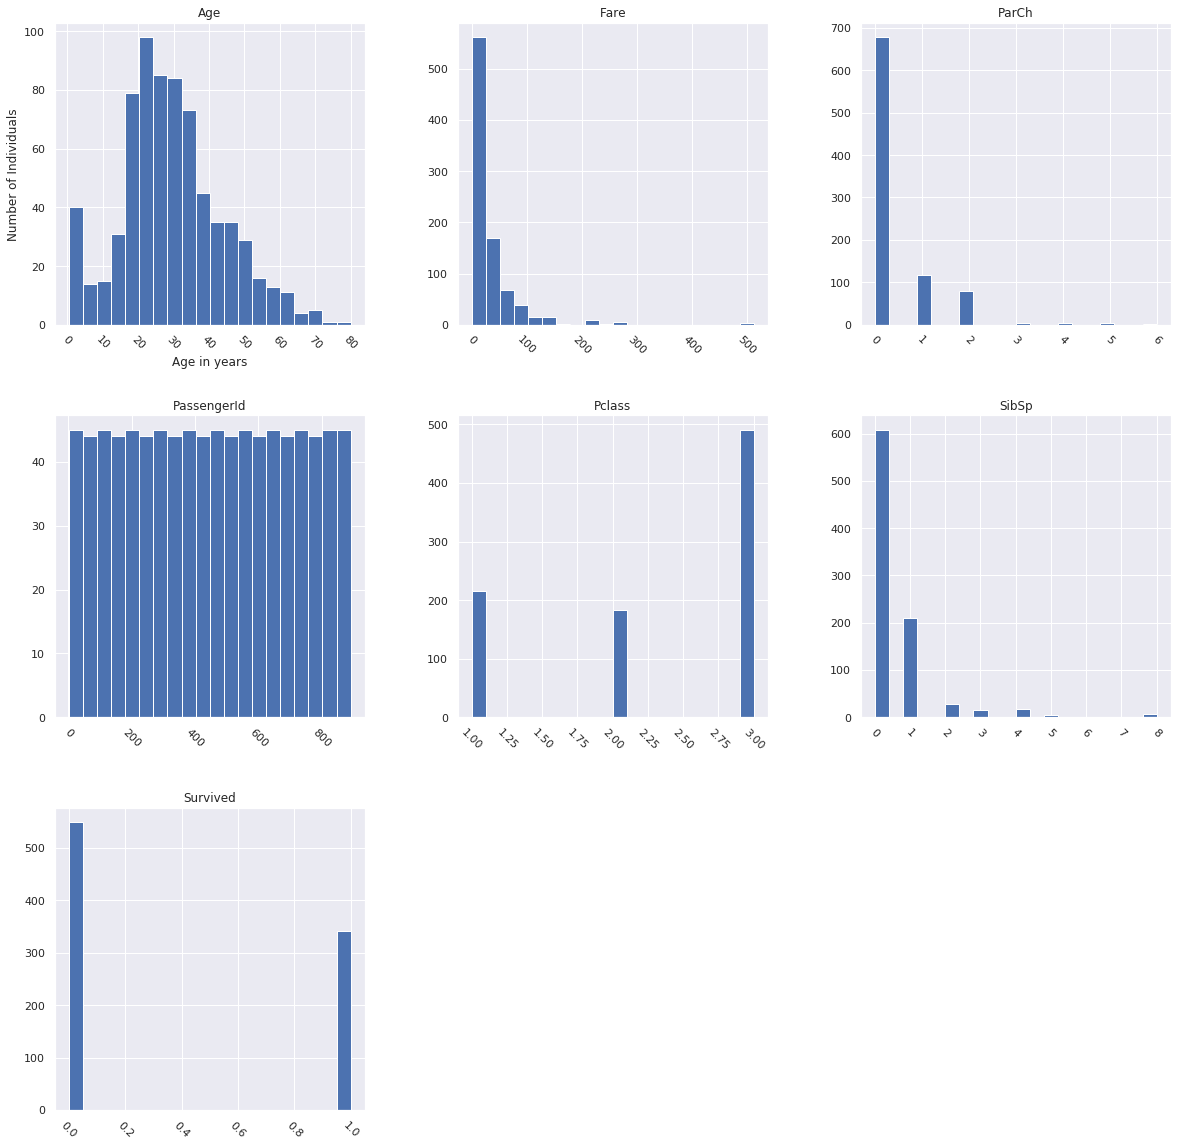

In [17]:
axesArray = data.hist(bins=20, xrot=-45, figsize=(20,20)) # returns axes as an multi-dimension array
axesArray = axesArray.flatten() # make axes easier to iterate over 

# Styling the plots axes'
axesArray[0].set_title('Age')
axesArray[0].set_xlabel("Age in years")
axesArray[0].set_ylabel("Number of Individuals")

plt.show()

# PMF

A pdf represents all the possible values in a distribution and their probabilities

pdf - histogram is usefule for a small amount of unique values

todo

# CDF

A CDF is useful for visualizing multiple distributions side by side

todo

## Ecdf

Useful for multiple distributions on one plot 

Can be used to compare different values and their relationship among 

Benefit to compare multiple histograms

y label represents percentiles

You can say something about all other points in relation to a specific value

Can be read as: "1 specific value makes some percentage more than them"

Plot ECDF of a single column.

In [18]:
def prep_ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Ecdf for multiple values in a distribution

In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

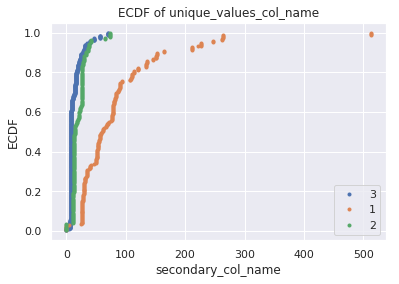

In [20]:
# 1. Set up Figure
fig = plt.figure()
# 2. Grab the `axis` and save to `ax`
ax = plt.gca()

# todo rename variables 
unique_values_col_name = 'Pclass' # label_names
secondary_col_name = "Fare" 

# For loop adds a new line plot to `ax` each iteration, 
# and adds name of each unique 'county' to 'labels' list,
# this is for use in the legend.
labels = []
for unique_value in data[unique_values_col_name].unique():
    # Grab income values for each county in county_df and Set up x and y using prep_ecdf()     
    x,y = prep_ecdf(data[data[unique_values_col_name] == unique_value][secondary_col_name])
    # 3. Simple line plot of x vs y
    ax.plot(x,y,marker=".", linestyle="none")
    # 4. Append each county to labels
    labels.append(unique_value)

# Make It Pretty!

# 1. Make a legend out of the labels list from for loop.
ax.legend(labels, loc='lower right')
# 2. set_xlabel and set_ylabel
ax.set_title("ECDF of unique_values_col_name")
ax.set_xlabel("secondary_col_name")
ax.set_ylabel("ECDF")
# 3. Remove annoying "out" stuff when printing plot.
plt.show()

# KDE Plot

large amount of unique values
smoothed out histogram/ pdf

## Categorical Distributions

## Bar plot 

Show categorical feature distribution

cons: 
- doesn't work well with many unique values

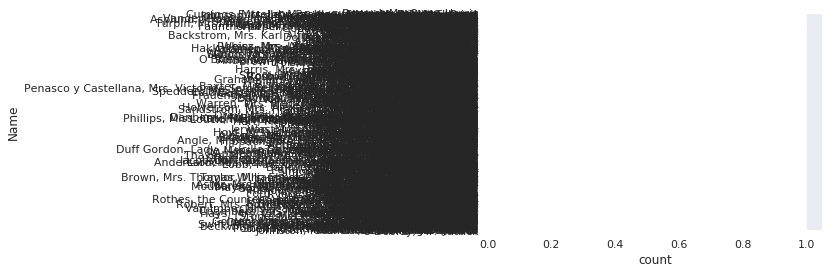

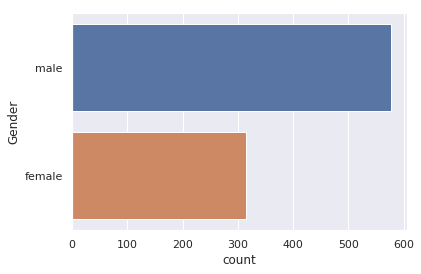

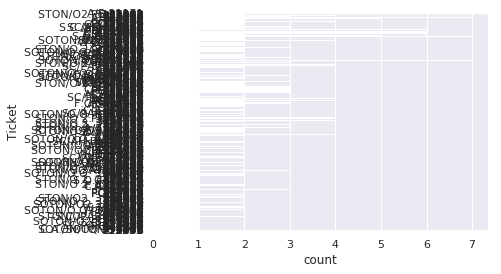

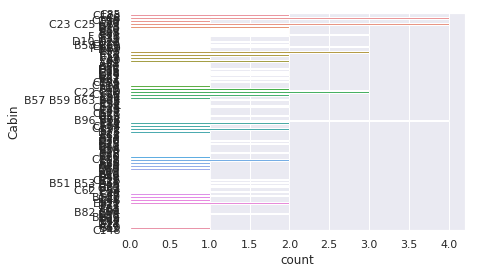

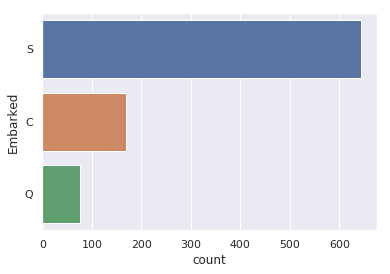

In [21]:
# Plot bar plot for each categorical feature
for col in data.dtypes[data.dtypes == "object"].index:
    sns.countplot(y=col, data=data)
    plt.show()

## Swarm plots
Draw a categorical scatterplot with non-overlapping points.
A swarm plot is good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

Note:
- x must be some column with categorical data
- y must be some column with numerical data

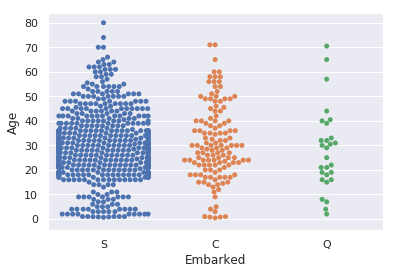

In [22]:
sns.swarmplot(x="Embarked", y="Age", data=data)
plt.show()

# Violin plot

A violin plot is a method of plotting numeric data

It is similar to a box plot, with the addition of a rotated kernel density plot on each side.

The hybrid between a Histogram and Swarmplot is a violinplot it shows the IQR and median!

A Violin Plot is similar to a swarm plot, except we give up a bit of the granularity of the Swarm Plot, in favor of IQR and Median markers.

Make the X parameter equal to what you want to see 

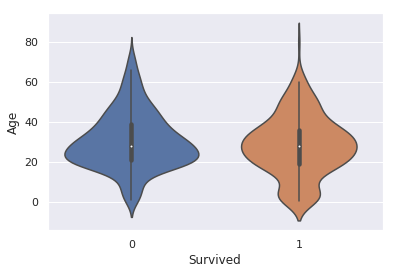

In [23]:
sns.violinplot(x = "Survived", y="Age", data=data)
plt.show()

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Segmentations

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

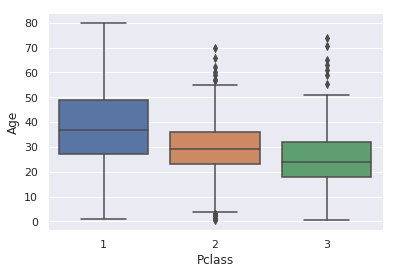

In [25]:
sns.boxplot(x='Pclass', y='Age', data=data)
plt.show()

### Segment by property_type and display the means within each class

In [26]:
data.groupby("Pclass").describe().T

Pclass                      1           2           3
PassengerId count  216.000000  184.000000  491.000000
            mean   461.597222  445.956522  439.154786
            std    246.737616  250.852161  264.441453
            min      2.000000   10.000000    1.000000
            25%    270.750000  234.500000  200.000000
            50%    472.000000  435.500000  432.000000
            75%    670.500000  668.000000  666.500000
            max    890.000000  887.000000  891.000000
Survived    count  216.000000  184.000000  491.000000
            mean     0.629630    0.472826    0.242363
            std      0.484026    0.500623    0.428949
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      1.000000    0.000000    0.000000
            75%      1.000000    1.000000    0.000000
            max      1.000000    1.000000    1.000000
Age         count  186.000000  173.000000  355.000000
            mean    38.233441   29.877630   25.140620
            std     14.802856   14.001077   12.495398
            min      0.920000    0.670000    0.420000
            25%     27.000000   23.000000   18.000000
            50%     37.000000   29.000000   24.000000
            75%     49.000000   36.000000   32.000000
            max     80.000000   70.000000   74.000000
SibSp       count  216.000000  184.000000  491.000000
            mean     0.416667    0.402174    0.615071
            std      0.611898    0.601633    1.374883
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    1.000000    1.000000
            max      3.000000    3.000000    8.000000
ParCh       count  216.000000  184.000000  491.000000
            mean     0.356481    0.380435    0.393075
            std      0.693997    0.690963    0.888861
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      0.000000    1.000000    0.000000
            max      4.000000    3.000000    6.000000
Fare        count  216.000000  184.000000  491.000000
            mean    84.154687   20.662183   13.675550
            std     78.380373   13.417399   11.778142
            min      0.000000    0.000000    0.000000
            25%     30.923950   13.000000    7.750000
            50%     60.287500   14.250000    8.050000
            75%     93.500000   26.000000   15.500000
            max    512.329200   73.500000   69.550000

### Segment by property_type and display the means and standard deviations within each class

In [27]:
data.groupby("Pclass").agg([np.mean, np.std]).T

Pclass                     1           2           3
PassengerId mean  461.597222  445.956522  439.154786
            std   246.737616  250.852161  264.441453
Survived    mean    0.629630    0.472826    0.242363
            std     0.484026    0.500623    0.428949
Age         mean   38.233441   29.877630   25.140620
            std    14.802856   14.001077   12.495398
SibSp       mean    0.416667    0.402174    0.615071
            std     0.611898    0.601633    1.374883
ParCh       mean    0.356481    0.380435    0.393075
            std     0.693997    0.690963    0.888861
Fare        mean   84.154687   20.662183   13.675550
            std    78.380373   13.417399   11.778142

# Advanced segmentations

Because the target variable is categorical, it can often be helpful to expand your segmentation analysis. 

<br>

**Now, we'll see how to do bivariate segmentations, which can be produced with the <code style="color:steelblue">sns.lmplot()</code> function from the Seaborn library.**
* <code style="color:steelblue">sns.lmplot()</code> is essentially a regular **scatterplot** with additional options.
* For example, we can color each point based on a <code style="color:steelblue">column</code>.
* To do so, we'll use the <code style="color:steelblue">hue=</code> argument.

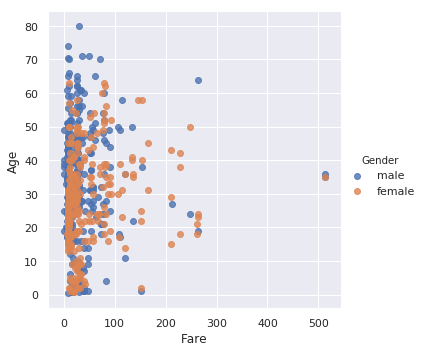

In [28]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x="Fare", y="Age", data=data, hue='Gender', fit_reg=None)
plt.show()

<hr>

# <span style="color: blue">Correlations</span>

A Correlation is the process of establishing a relationship or connection between two or more measures.

When there is a change in one category how is the other category changed/altered?
- negative correlation: -1 
- no correlation: 0
- positive correlation: +1

## Scatter Plot

When to use: 

- When you have a time scale along the horizontal axis, the line plot is your friend. 
- Trying to assess if there's a correlation between two variables, for example, the scatter plot is the better choice. Below is an example of how to build a scatter plot.


In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


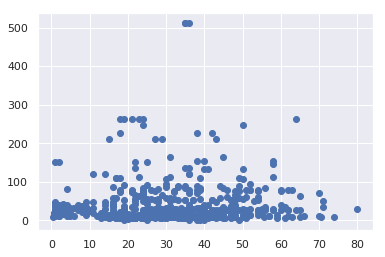

In [30]:
plt.scatter(x=data["Age"],y= data["Fare"])

# Put the x-axis on a logarithmic scale
# plt.xscale('log')

# Select a certain range to visualize
# ax = plt.gca()
# ax.set_ylim([0,100])

plt.show()

### Pearson Correlation Coefficient
Use the pearson_coeff function to determine how the two features correlate

The Pearson correlation coefficent describes a correlation and bounds it between -1 and 1.

Covariance is bounded by -infinity and infinity

Note: There can not be NAN values when calculating the Pearson Correlation Coefficient

In [31]:
def pearson_coeff(x,y):
    covar = np.cov(x, y)[0,1]
    std_x = np.std(x)
    std_y = np.std(y)
    
    return covar / (std_x * std_y)

In [32]:
feat1 = "Pclass"
feat2 = "Fare"

# remove NaN values
indexes = ~((np.isnan(data[feat1])) | (np.isnan(data[feat2])))

pearson_coeff(data.loc[indexes, feat1], data.loc[indexes, feat2])

-0.550117035247214

## Relationships between numeric features and other numeric features.

Note:
- heatmaps help make correlations easier to visualize

Arguments:
 - cbar: Show correlation bar

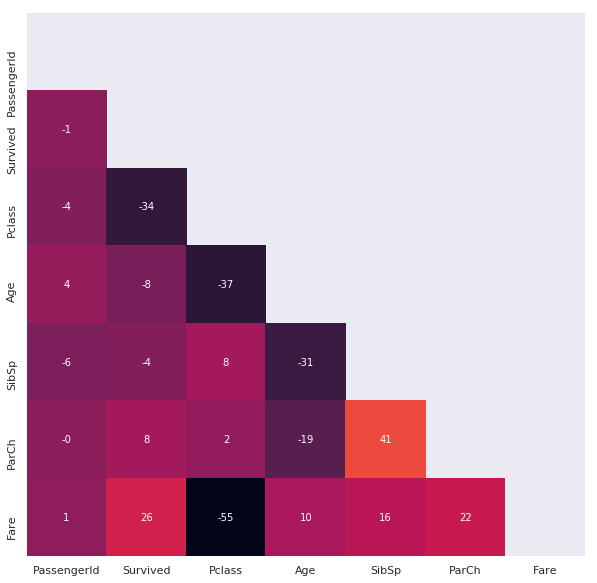

In [33]:
# Calculate correlations between numeric features
correlations = data.corr()

# Make the figsize desired size 
plt.figure(figsize=(10,10))

# make each correlation be a whole number from -100 to 100
correlations = correlations * 100

# Generate a mask for the upper triangle
bool_mask = np.zeros_like(correlations, dtype=np.bool)
bool_mask[np.triu_indices_from(bool_mask)] = True

# Plot heatmap of correlations
sns.heatmap(data=correlations, annot=True, fmt='.0f', mask=bool_mask, cbar=False)

plt.show()